# Exploratory data analysis

http://patbaa.web.elte.hu/physdm/data/titanic.csv

On the link above you will find a dataset about the Titanic passengers. Your task is to explore the dataset.

Help for the columns:
 - SibSp - number of sibling/spouses on the ship
 - Parch - number of parent/children on the ship
 - Cabin - the cabin they slept in (if they had a cabin)
 - Embarked - harbour of entering the ship
 - Pclass - passenger class (like on trains)



#### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not. 
Impute the missing values in a sensible way:
 - if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense
 - if in a row almost all the entries is missing, it worth to remove that given row
 - if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). 
 
The imputing method affects different machine learning models different way, but now we are interested only in EDA, so try to keep as much information as possible!



#### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.



#### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!



#### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.

Which feature seems to play the most important role in surviving/not surviving? Explain how and why could that feature be important! 



#### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not. 
Impute the missing values in a sensible way:
 - if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense
 - if in a row almost all the entries is missing, it worth to remove that given row
 - if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). 
 
The imputing method affects different machine learning models different way, but now we are interested only in EDA, so try to keep as much information as possible!



In [2]:
df_titanic = pd.read_csv('Data/titanic.csv')

In [3]:
print('Nr of datarows: ',len(df_titanic))

Nr of datarows:  891


In [4]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Nan values in the datafame (yellow)')

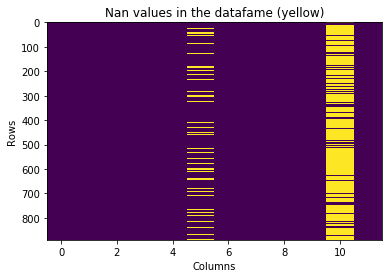

In [5]:
plt.imshow(df_titanic.isna(),aspect='auto')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Nan values in the datafame (yellow)')

##### 1. conclusion
* There are missing values (nan) in the columns **Age**, **Cabin** and **Embarked**. 
* We can select only the useful columns in further analysis, or the useful rows of the columns.
* Or we can follow the instructions: 
  - if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense
 - if in a row almost all the entries is missing, it worth to remove that given row
 - if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). 

In [6]:
# drop rows of nan value in Embarked row:
df_titanic = df_titanic[df_titanic['Embarked'].notna()]
# replace the missing values in the Age and Cabin with -1, which is not in them:
df_titanic_rep = df_titanic.copy()
df_titanic_rep = df_titanic_rep.fillna(-1)

#### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.


In [7]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print('Types of passenger class')
set(df_titanic.Pclass)

Types of passenger class


{1, 2, 3}

In [9]:
df_titanic_sub2 = df_titanic[['Survived','Pclass']].copy()

In [10]:
df_titanic_sub2_result = df_titanic_sub2.groupby(by='Pclass').sum() # because the 1 means alive
nr_c1 = len(df_titanic_sub2[df_titanic_sub2.Pclass == 1])
nr_c2 = len(df_titanic_sub2[df_titanic_sub2.Pclass == 2])
nr_c3 = len(df_titanic_sub2[df_titanic_sub2.Pclass == 3])

nr_class_list = [nr_c1,nr_c2,nr_c3]
print('nr of people in classes: ',nr_class_list)
df_titanic_sub2_result['Dead'] = nr_class_list - df_titanic_sub2_result['Survived'] 


nr of people in classes:  [214, 184, 491]


In [11]:
df_titanic_sub2_result

,Survived,Dead
Pclass,,
1,134,80
2,87,97
3,119,372


([], <a list of 0 Text xticklabel objects>)

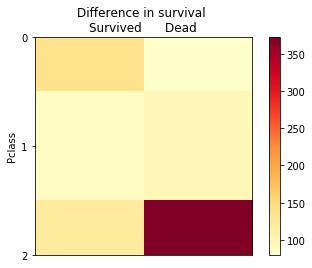

In [12]:
plt.imshow(df_titanic_sub2_result,cmap='YlOrRd')
plt.title('Difference in survival \nSurvived      Dead')# this could be done by plt.text and positioning
plt.colorbar()
plt.yticks(ticks=[0,1,2])
plt.ylabel('Pclass')
plt.xticks([],[])

##### 2. conclusion:
* The value of Survived is 0 or 1, let's say 1 is alive, 0 is dead.
* Much more cassualties happend on the 3. class, maybe the cheaper places were near the bottom, so the water reached them more quickly.


#### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!

In [13]:
import seaborn as sn

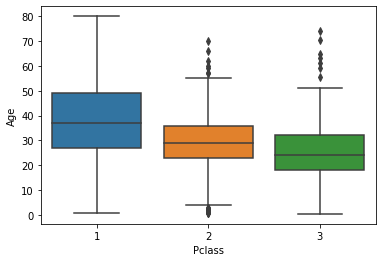

In [14]:
sn.boxplot(x='Pclass', y='Age', data = df_titanic)

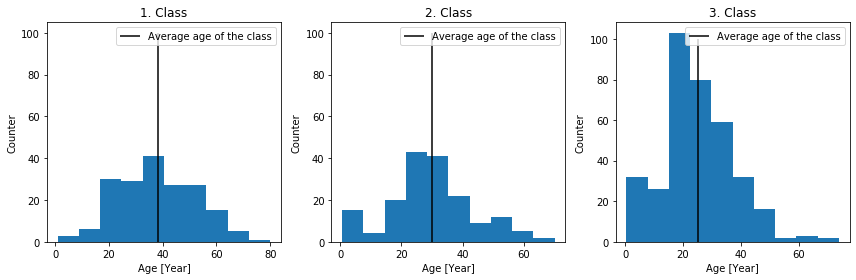

In [15]:
age_titanic_c1 = list(df_titanic_rep[(df_titanic_rep.Pclass == 1) & (df_titanic_rep.Age !=-1) ].Age)
age_titanic_c2 = list(df_titanic_rep[(df_titanic_rep.Pclass == 2) & (df_titanic_rep.Age !=-1) ].Age)
age_titanic_c3 = list(df_titanic_rep[(df_titanic_rep.Pclass == 3) & (df_titanic_rep.Age !=-1) ].Age)

age_mean_c1 = np.mean(age_titanic_c1)
age_mean_c2 = np.mean(age_titanic_c2)
age_mean_c3 = np.mean(age_titanic_c3)


plt.figure(figsize=(12,4))
plt.title('Age distributions of the passenger classes')


plt.subplot(1,3,1)
plt.hist(age_titanic_c1)
plt.xlabel('Age [Year]')
plt.ylabel('Counter')
plt.title('1. Class')
plt.vlines(age_mean_c1,0,100,label='Average age of the class')
plt.legend()

plt.subplot(1,3,2)
plt.hist(age_titanic_c2)
plt.xlabel('Age [Year]')
plt.ylabel('Counter')
plt.title('2. Class')
plt.vlines(age_mean_c2,0,100,label='Average age of the class')
plt.legend()

plt.subplot(1,3,3)
plt.hist(age_titanic_c3)
plt.xlabel('Age [Year]')
plt.ylabel('Counter')
plt.title('3. Class')
plt.vlines(age_mean_c3,0,100,label='Average age of the class')
plt.legend()


plt.tight_layout()

#### 3. conclusion:

* Let's select only the age data where there are valid values (positive numbers).
* More younger passengers were in the 3. class. In the first class there were less children.

#### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.

Which feature seems to play the most important role in surviving/not surviving? Explain how and why could that feature be important! 

In [16]:
corr_matrix = df_titanic.corr() # the corr() excludes the nan values in default.
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000


([<matplotlib.axis.YTick at 0x7fe30a5b8d90>,
 <a list of 7 Text yticklabel objects>)

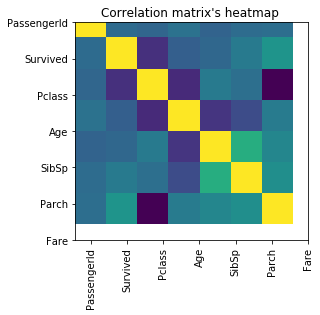

In [17]:
col_names = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']


plt.imshow(corr_matrix)
plt.title('Correlation matrix\'s heatmap ')
plt.xticks(np.linspace(0,len(col_names),len(col_names)),labels=col_names,rotation = 90)
plt.yticks(np.linspace(0,len(col_names),len(col_names)),labels=col_names,rotation = 0)



#### 4. Conclusion:

Help for the columns:
 - SibSp - number of sibling/spouses on the ship
 - Parch - number of parent/children on the ship
 - Cabin - the cabin they slept in (if they had a cabin)
 - Embarked - harbour of entering the ship
 - Pclass - passenger class (like on trains)



THe survavial is strongly correlated  (stronger than others) with Passenger class values (-0.335549). It's a greater negative value, wihch shows a correlation, the lower (cheaper) the passenger class, the survived value is lower. Also survival is correlated with the fare, but it's strongly correlated with the pclass, so the higher classes are more expensive. 

#### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)

In [18]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_titanic_sub5_nona = df_titanic[['Age','Fare','Pclass','Survived']].copy().dropna()  #age,fare

In [20]:
df_titanic_sub5_nona.isna().sum()

Age         0
Fare        0
Pclass      0
Survived    0
dtype: int64

In [21]:
df_titanic_sub5_nona_a = df_titanic_sub5_nona.groupby(by='Age',as_index=False).mean()

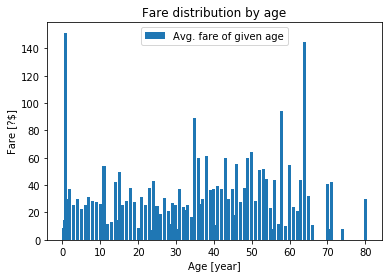

In [22]:
titanic_age = df_titanic_sub5_nona_a.Age
titanic_fare = df_titanic_sub5_nona_a.Fare

plt.bar(titanic_age,height =titanic_fare,label='Avg. fare of given age')
plt.title('Fare distribution by age')
plt.xlabel('Age [year]')
plt.ylabel('Fare [?$]')
plt.legend()

In [23]:
df_titanic_sub5_nona_b = df_titanic_sub5_nona.groupby(by='Age',as_index=False).mean()

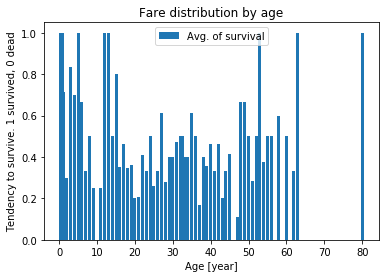

In [24]:
titanic_age_b = df_titanic_sub5_nona_b.Age
titanic_avg_surv = df_titanic_sub5_nona_b.Survived

plt.bar(titanic_age_b,height=titanic_avg_surv,label='Avg. of survival')
plt.title('Fare distribution by age')
plt.xlabel('Age [year]')
plt.ylabel('Tendency to survive. 1 survived, 0 dead')
plt.legend()

### 5. Conclusion:

The older passenger didn't buy more expensive tickets, there is no strong connection between. 

The the youngest passengers survived. However there isn't any strong tendency in the other agegroups.  